# LangGraph SubGraphs and Recursive Streaming Agentic Behaviour


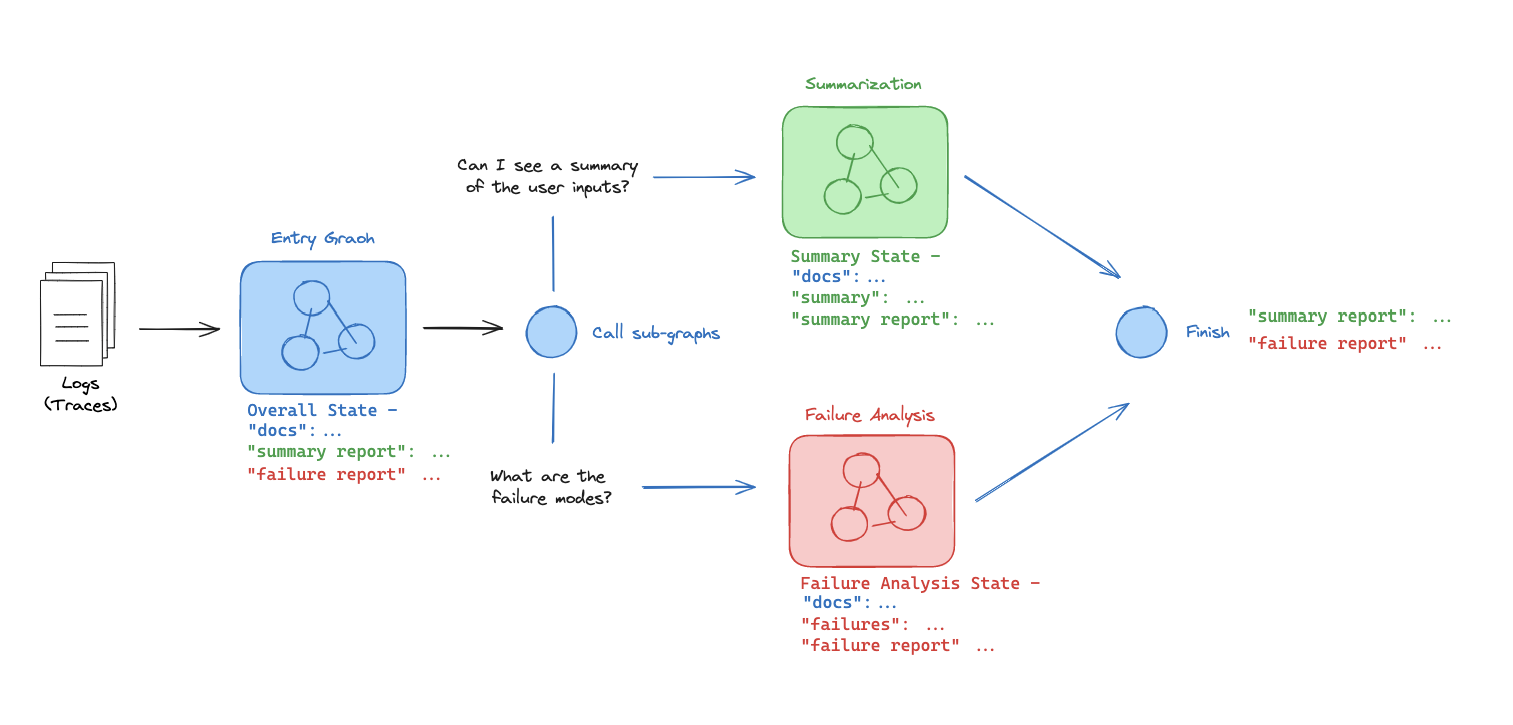

In [18]:

%%capture --no-stderr
%pip install -U langgraph
%pip install -q together

In [3]:
%pip install --upgrade --quiet  langchain-core langchain-google-vertexai

Note: you may need to restart the kernel to use updated packages.


In [24]:
from langchain_anthropic import ChatAnthropic
from typing import Dict, Tuple, List, Optional
from typing_extensions import TypedDict
from typing import Annotated
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())



True

In [4]:
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import Runnable
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import AnyMessage, add_messages
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [9]:
def handle_tool_error(state) -> Dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix the error",
                tool_call_id=tc["id"],
            )
            for tc in tool_calls
        ]
    }

In [10]:
def create_tool_node_with_fallback(tools: List) -> Dict:
    return ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)],
        exception_key = "error"
    )

In [17]:
class State(TypedDict):
    def __init__(self):
        self.messages = Annotated[list(AnyMessage), add_messages]

# Security Evaluation

## Tools

In [26]:
anthropic = False
if anthropic == True:
    model = ChatAnthropic(model='claude-3-opus-20240229')

In [38]:
from src.prompts_config import CTIPrompts
ira_prompt, vsa_prompt, tda_promp = CTIPrompts()

ModuleNotFoundError: No module named 'src'

In [27]:
from agents.incident_agent import IncidentReportingAgent
from agents.threat_agent import ThreatDetectionAgent
from agents.vuln_agent import VulnerabilityScannerAgent

from prompts_config import CTIPrompts, _get_agent_prompts

def _get_prompts():
    cti = CTIPrompts()
    threat_prompts, vuln_prompts, incident_prompts = _get_agent_prompts()
    agents_prompts = {
        {"ira": IncidentReportingAgent(),
        "ira_prompt": IncidentReportingAgent._get_agent_prompt()},
        {"vsa": VulnerabilityScannerAgent(),
        "vsa_prompt": VulnerabilityScannerAgent._get_agent_prompt()},
        {"tda": ThreatDetectionAgent(),
        "tda_prompt": ThreatDetectionAgent._get_agent_prompt()},
    }

SyntaxError: ':' expected after dictionary key (3865209876.py, line 5)

In [25]:
import os
from together import Together

client = Together()

TOGETHER_API_KEY=os.getenv("TOGETHER_API_KEY")

client = Together(api_key=os.getenv('TOGETHER_API_KEY'))

response = client.chat.completions.create(
    model="meta-llama/Llama-3.2-3B-Instruct-Turbo",
    messages=[{"role": "user", "content": "What are the "}],
)
print(response.choices[0].message.content)



AuthenticationError: Error code: 401 - {"message": "Invalid API key provided. You can find your API key at https://api.together.xyz/settings/api-keys.", "type_": "invalid_request_error", "code": "invalid_api_key"}

In [ ]:
import json
from typing import List, Dict, Any

def compute_cyber_risk_evaluation(data: Dict[str, Any], recursion_depth: int = 0, max_depth: int = 3) -> Dict[str, Any]:
    """
    Function to compute the potential cyber risk based on the ingested data,
    including a recursive analysis to refine risk estimates.
    
    Args:
        data (dict): Input data containing information about the system (e.g., vulnerabilities, threats).
        recursion_depth (int): Current depth of the recursive analysis.
        max_depth (int): Maximum depth for recursive analysis to prevent infinite loops.
    
    Returns:
        dict: ECS-compatible JSON output containing:
            - 'threat_assessment': Threat assessment based on the input data.
            - 'vulnerability_analysis': Analysis of system vulnerabilities.
            - 'risk_score': The calculated cyber risk score based on the analysis.
            - 'security_assessment': Basic security evaluation for the tool.
    """
    
    def threat_assessment(data: Dict[str, Any]) -> Dict[str, Any]:
        """
        Analyze potential threats based on input data.
        """
        # Dummy threat assessment based on data content
        if "threats" in data and isinstance(data["threats"], list):
            threat_level = len(data["threats"])
        else:
            threat_level = 0
        
        return {
            "threat_level": threat_level,
            "description": f"Identified {threat_level} potential threats based on the provided data."
        }
    
    def vulnerability_analysis(data: Dict[str, Any]) -> Dict[str, Any]:
        """
        Analyze system vulnerabilities based on input data.
        """
        # Dummy vulnerability analysis based on data content
        if "vulnerabilities" in data and isinstance(data["vulnerabilities"], list):
            vulnerability_score = len(data["vulnerabilities"]) * 10  # Arbitrary scoring
        else:
            vulnerability_score = 0
        
        return {
            "vulnerability_score": vulnerability_score,
            "description": f"Identified {vulnerability_score} potential vulnerabilities."
        }
    
    def security_evaluation() -> Dict[str, Any]:
        """
        Basic security evaluation for the tool.
        """
        return {
            "data_privacy": {
                "description": "Assessment of how user data is handled and whether it's encrypted during transmission.",
                "result": "Data is securely transmitted using encryption (HTTPS). No sensitive data is stored or shared."
            },
            "input_validation": {
                "description": "Ensures that the input data is validated to prevent malicious input such as SQL injections or overflows.",
                "result": "Input is sanitized to ensure only valid data is processed."
            },
            "system_resilience": {
                "description": "Basic evaluation of the system's resilience against typical cyber threats.",
                "result": "System is resilient to common web-based threats and denial of service attacks."
            }
        }
    
    def calculate_risk_score(threat_level: int, vulnerability_score: int) -> float:
        """
        Calculate an overall risk score based on threat and vulnerability analysis.
        """
        return (threat_level * 2 + vulnerability_score * 1.5) / 10  # Arbitrary formula for scoring
    
    # Analyze threats and vulnerabilities
    threat_data = threat_assessment(data)
    vulnerability_data = vulnerability_analysis(data)
    
    # Calculate overall risk score
    risk_score = calculate_risk_score(threat_data['threat_level'], vulnerability_data['vulnerability_score'])
    
    # Perform recursive analysis if needed
    if recursion_depth < max_depth:
        print(f"Recursion level {recursion_depth}: refining analysis with updated data...")
        # Update the data with the new risk score and re-analyze (recursively)
        refined_data = {
            "threats": data.get("threats", []) + ["recursive_threat_" + str(recursion_depth)],
            "vulnerabilities": data.get("vulnerabilities", []) + ["recursive_vulnerability_" + str(recursion_depth)]
        }
        return compute_cyber_risk_evaluation(refined_data, recursion_depth + 1, max_depth)
    
    # Perform a basic security evaluation
    security_data = security_evaluation()

    # Combine both into an ECS-friendly JSON structure
    result = {
        "@timestamp": "2024-10-04T12:34:56.789Z",
        "event": {
            "module": "cyber_risk_estimation",
            "action": "compute_risk"
        },
        "cyber_risk_estimation": {
            "threat_assessment": threat_data,
            "vulnerability_analysis": vulnerability_data,
            "risk_score": round(risk_score, 2)
        },
        "security_assessment": security_data
    }
    
    # Return ECS-compatible JSON structure
    return result


# Example usage
input_data = {
    "threats": ["phishing", "malware"],
    "vulnerabilities": ["outdated_software", "weak_passwords"]
}

# Call the recursive cyber risk evaluation
ecs_json_output = compute_cyber_risk_evaluation(input_data)

# Output the ECS-compatible JSON
print(json.dumps(ecs_json_output, indent=4))


In [ ]:
def handle_tool_error(state) -> Dict:
    """
    Function to handle errors that occur during tool execution.
    
    Args:
        state (dict): The current state of the AI agent, which includes messages and tool call details.
    
    Returns:
        dict: A dictionary containing error messages for each tool that encountered an issue.
    """
    # Retrieve the error from the current state
    error = state.get("error")
    
    # Access the tool calls from the last message in the state's message history
    tool_calls = state["messages"][-1].tool_calls
    
    # Return a list of ToolMessages with error details, linked to each tool call ID
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",  # Format the error message for the user
                tool_call_id=tc["id"],  # Associate the error message with the corresponding tool call ID
            )
            for tc in tool_calls  # Iterate over each tool call to produce individual error messages
        ]
    }

def create_tool_node_with_fallback(tools: list) -> dict:
    """
    Function to create a tool node with fallback error handling.
    
    Args:
        tools (list): A list of tools to be included in the node.
    
    Returns:
        dict: A tool node that uses fallback behavior in case of errors.
    """
    # Create a ToolNode with the provided tools and attach a fallback mechanism
    # If an error occurs, it will invoke the handle_tool_error function to manage the error
    return ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)],  # Use a lambda function to wrap the error handler
        exception_key="error"  # Specify that this fallback is for handling errors
    )

# Assistant


In [ ]:
class Assistant:
    def __init__(self, runnable: Runnable):
        # Initialize with the runnable that defines the process for interacting with the tools
        self.runnable = runnable

    def __call__(self, state: State):
        while True:
            # Invoke the runnable with the current state (messages and context)
            result = self.runnable.invoke(state)
            
            # If the tool fails to return valid output, re-prompt the user to clarify or retry
            if not result.tool_calls and (
                not result.content
                or isinstance(result.content, list)
                and not result.content[0].get("text")
            ):
                # Add a message to request a valid response
                messages = state["messages"] + [("user", "Respond with a real output.")]
                state = {**state, "messages": messages}
            else:
                # Break the loop when valid output is obtained
                break

        # Return the final state after processing the runnable
        return {"messages": result}

# Graph Structure

In [ ]:
builder = StateGraph(State)
builder.add_node("assistant", Assistant(part_1_assistant_runnable))
builder.add_node("tools", create_tool_node_with_fallback(part_1_tools))

In [ ]:
builder.add_edge(START, "assistant")  # Start with the assistant
builder.add_conditional_edges("assistant", tools_condition)  # Move to tools after input
builder.add_edge("tools", "assistant")  # Return to assistant after tool execution

In [ ]:
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

In [ ]:
# import shutil
import uuid

# Let's create an example conversation a user might have with the assistant
tutorial_questions = [
    'hey',
    'can you calculate my energy saving',
    "my montly cost is $100, what will i save"
]

# Update with the backup file so we can restart from the original place in each section
# shutil.copy(backup_file, db)
thread_id = str(uuid.uuid4())

config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        # "passenger_id": "3442 587242",
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}

_printed = set()
for question in tutorial_questions:
    events = graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
    for event in events:
        _print_event(event, _printed)